Reading the Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Load the huge dataset
# (Make sure to mount drive if you haven't: from google.colab import drive; drive.mount('/content/drive'))
file_path = '/content/drive/MyDrive/glassdoor_reviews.csv' # UPDATE THIS PATH
df_full = pd.read_csv(file_path)

In [ ]:
print(f"Original Dataset Size: {len(df_full)} rows")

Original Dataset Size: 838566 rows


In [ ]:
# 2. Create a "Workable" Sample (e.g., 50,000 rows)
# We use 'stratify' to make sure if 10% of original data is 1-star, 10% of sample is also 1-star.
# random_state=42 ensures you get the exact same 50k rows every time you run this.
df_working, df_unused = train_test_split(
    df_full,
    train_size=50000,  # 50,000 is the "Sweet Spot" for Colab
    stratify=df_full['overall_rating'],
    random_state=42
)

In [ ]:
# 3. Rename it back to 'df' so your other code still works
df = df_working.copy()

print(f"New Working Dataset Size: {len(df)} rows")

New Working Dataset Size: 50000 rows


In [ ]:
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
99839,Bloomberg-L-P,2012-09-09,Anonymous Employee,"Former Employee, more than 5 years",NaN,3,2.0,2.0,NaN,3.0,3.0,3.0,v,v,r,Not the company it used to be,"Good benefits package, fast paces environment","Politics, lack of transparency, basic respect ..."
539662,McDonald-s,2020-11-09,Cashier,Current Employee,"Colorado Springs, CO",3,4.0,4.0,5.0,4.0,3.0,4.0,x,r,r,Not good for mental health,Crew members get work done and are welcoming a...,Most accidents don’t receive aid and there’s l...
684945,PwC,2018-08-10,Anonymous Employee,Current Employee,NaN,3,2.0,3.0,NaN,3.0,1.0,2.0,v,r,v,Senior Associate,-Met some great people\r\n-Good exposure to cl...,-Work life balance can take a hit during busy ...
528284,McDonald-s,2019-05-28,Anonymous Employee,"Former Employee, less than 1 year","Modesto, CA",3,1.0,2.0,NaN,2.0,1.0,2.0,x,r,v,ok for first job,it's a job to pay bills,customers are very demanding and always have t...
223564,Deutsche-Bank,2019-10-02,,Current Employee,NaN,5,5.0,5.0,NaN,5.0,5.0,5.0,v,v,v,Employee friendly,Good working environment with motivational staff,Sometime you have to do work in Extra time


In [ ]:
df.shape

(50000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 99839 to 636988
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   firm                 50000 non-null  object 
 1   date_review          50000 non-null  object 
 2   job_title            50000 non-null  object 
 3   current              50000 non-null  object 
 4   location             32173 non-null  object 
 5   overall_rating       50000 non-null  int64  
 6   work_life_balance    41106 non-null  float64
 7   culture_values       38671 non-null  float64
 8   diversity_inclusion  8121 non-null   float64
 9   career_opp           41261 non-null  float64
 10  comp_benefits        41131 non-null  float64
 11  senior_mgmt          40755 non-null  float64
 12  recommend            50000 non-null  object 
 13  ceo_approv           50000 non-null  object 
 14  outlook              50000 non-null  object 
 15  headline             49841 non-null 

Selecting relevant columns

In [ ]:
selected_columns = ['firm', 'job_title', 'headline', 'overall_rating', 'pros', 'cons']
# filtered dataframe create
filtered_df = df[selected_columns].copy()

In [ ]:
filtered_df.head()

,firm,job_title,headline,overall_rating,pros,cons
99839,Bloomberg-L-P,Anonymous Employee,Not the company it used to be,3,"Good benefits package, fast paces environment","Politics, lack of transparency, basic respect ..."
539662,McDonald-s,Cashier,Not good for mental health,3,Crew members get work done and are welcoming a...,Most accidents don’t receive aid and there’s l...
684945,PwC,Anonymous Employee,Senior Associate,3,-Met some great people\r\n-Good exposure to cl...,-Work life balance can take a hit during busy ...
528284,McDonald-s,Anonymous Employee,ok for first job,3,it's a job to pay bills,customers are very demanding and always have t...
223564,Deutsche-Bank,,Employee friendly,5,Good working environment with motivational staff,Sometime you have to do work in Extra time


In [ ]:
print("The shape of filtered dataframe is ", filtered_df.shape)

The shape of filtered dataframe is  (50000, 6)


Checking NaN values

In [ ]:
filtered_df.isnull().sum()

,0
firm,0
job_title,0
headline,159
overall_rating,0
pros,0
cons,0


Deleting NaN values

In [ ]:
df_final = filtered_df.dropna(subset=['pros','cons','headline'])

Missing Values after Cleaning

In [ ]:
print(df_final.isnull().sum())

firm              0
job_title         0
headline          0
overall_rating    0
pros              0
cons              0
dtype: int64


In [ ]:
len(df_final)

49841

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2276294220.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_rating', data=df_final, palette='viridis')


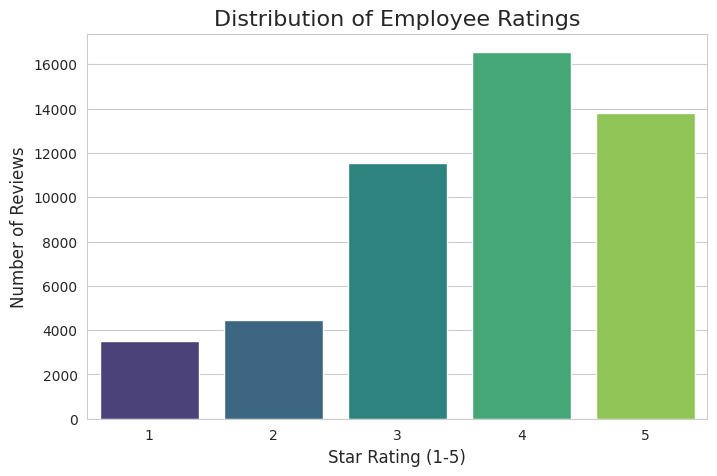

Exact counts per rating:
overall_rating
1     3499
2     4454
3    11537
4    16553
5    13798
Name: count, dtype: int64


In [ ]:
sns.set_style("whitegrid")
# Create the plot
plt.figure(figsize=(8, 5))
# We count how many times each rating (1, 2, 3, 4, 5) appears
sns.countplot(x='overall_rating', data=df_final, palette='viridis')

# Add labels
plt.title('Distribution of Employee Ratings', fontsize=16)
plt.xlabel('Star Rating (1-5)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Show the plot
plt.show()

# Print the actual numbers to be precise
print("Exact counts per rating:")
print(df_final['overall_rating'].value_counts().sort_index())

In [ ]:
import nltk
import re # 're' stands for Regular Expression (used for finding patterns)
from nltk.corpus import stopwords

# 1. Download the list of boring words (stop words) like "the", "is", "at"
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2. Define the Cleaning Function
def clean_my_text(text):
    # Step A: Convert to lowercase (so "Good" and "good" are the same)
    text = str(text).lower()

    # Step B: Remove special characters and numbers (keep only letters)
    # This regex command says: "If it's NOT a letter (a-z), replace it with a space"
    text = re.sub(r'[^a-z\s]', '', text)

    # Step C: Remove Stop Words
    # We split the sentence into words, check if they are in the 'stop_words' list, and keep only the good ones
    words = [word for word in text.split() if word not in stop_words]

    # Join the words back into a sentence
    return " ".join(words)

print("Cleaning function created successfully!")

# 3. Apply this function to your data
# First, let's combine Pros and Cons so the AI sees the full picture
df_final['combined_text'] = df_final['pros'] + " " + df_final['cons']

# Now, scrub the text clean! (This might take 10-20 seconds)
print("Cleaning reviews now... please wait...")
df_final['cleaned_reviews'] = df_final['combined_text'].apply(clean_my_text)

print("Success! Text cleaning complete.")
df_final[['combined_text', 'cleaned_reviews']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-4242144434.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['combined_text'] = df_final['pros'] + " " + df_final['cons']


Cleaning function created successfully!
Cleaning reviews now... please wait...
Success! Text cleaning complete.


/tmp/ipython-input-4242144434.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cleaned_reviews'] = df_final['combined_text'].apply(clean_my_text)


,combined_text,cleaned_reviews
99839,"Good benefits package, fast paces environment ...",good benefits package fast paces environment p...
539662,Crew members get work done and are welcoming a...,crew members get work done welcoming reliable ...
684945,-Met some great people\r\n-Good exposure to cl...,met great people good exposure clients experie...
528284,it's a job to pay bills customers are very dem...,job pay bills customers demanding always toes
223564,Good working environment with motivational sta...,good working environment motivational staff so...


Lemmetization

In [ ]:
# 1. Download the dictionary for lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Define the Lemmatization Function
def lemmatize_text(text):
    # Split the sentence into words
    words = text.split()
    # Convert each word to its root form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join them back into a sentence
    return " ".join(lemmatized_words)

# 3. Apply it to your clean text
print("Lemmatizing reviews... this may take a moment...")
df_final['lemmatized_text'] = df_final['cleaned_reviews'].apply(lemmatize_text)

print("Success! Normalization complete.")

# 4. Compare the results
# Let's see the difference between 'cleaned' and 'lemmatized'
df_final[['cleaned_reviews', 'lemmatized_text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmatizing reviews... this may take a moment...
Success! Normalization complete.


/tmp/ipython-input-2123791394.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lemmatized_text'] = df_final['cleaned_reviews'].apply(lemmatize_text)


,cleaned_reviews,lemmatized_text
99839,good benefits package fast paces environment p...,good benefit package fast pace environment pol...
539662,crew members get work done welcoming reliable ...,crew member get work done welcoming reliable a...
684945,met great people good exposure clients experie...,met great people good exposure client experien...
528284,job pay bills customers demanding always toes,job pay bill customer demanding always toe
223564,good working environment motivational staff so...,good working environment motivational staff so...


Vectorization to get the dtm(Document term matrix)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. Initialize the Vectorizer
# max_df=0.95: Ignore words that appear in 95% of reviews (too common, like "company")
# min_df=2: Ignore words that appear in less than 2 reviews (typos or rare words)
# stop_words='english': Double check to remove any remaining stop words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# 2. Fit and Transform
# This converts your text column into a giant matrix of numbers
print("Converting text to numbers... (Vectorization)")
dtm = vectorizer.fit_transform(df_final['lemmatized_text'])

# 3. Check the Shape
print("Document-Term Matrix created successfully!")
print(f"Shape: {dtm.shape}")
# Explanation: (Number of Reviews, Number of Unique Words)

Converting text to numbers... (Vectorization)
Document-Term Matrix created successfully!
Shape: (49841, 12816)


Topic Modeling : Extracting topics from data

Finding Coherence and Perplexity scores

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 70.6 MB/s eta 0:00:00
Preparing data for evaluation...
Starting Grid Search for Optimal Topics... Testing: [2, 5, 10, 15]
  Testing 2 topics...
    > Perplexity: 1099.40 | Coherence: 0.4139
  Testing 5 topics...
    > Perplexity: 1132.41 | Coherence: 0.4319
  Testing 10 topics...
    > Perplexity: 1196.18 | Coherence: 0.4495
  Testing 15 topics...
    > Perplexity: 1243.98 | Coherence: 0.4528

Tuning Complete!


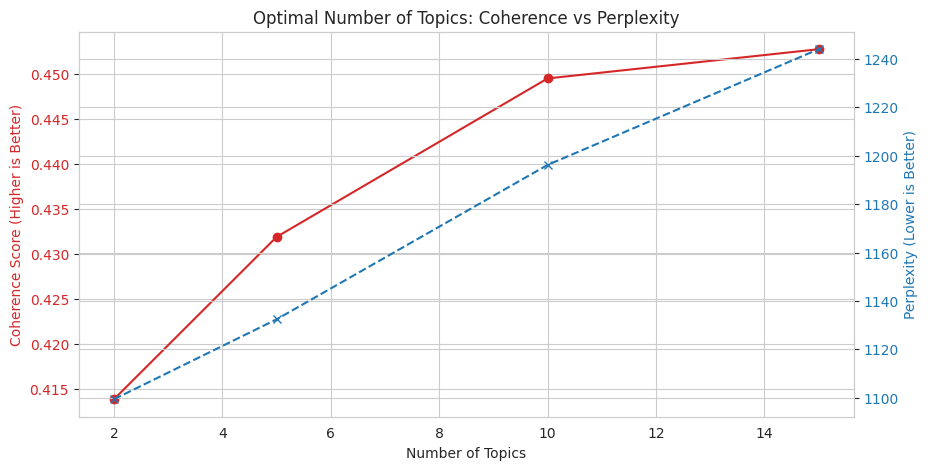

In [ ]:
# 1. Install Gensim (Just in case)
!pip install gensim

import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# --- PREPARATION ---
print("Preparing data for evaluation...")
texts = [str(text).split() for text in df_final['lemmatized_text'].values if str(text) != 'nan']

# Create Dictionary
dictionary = Dictionary(texts)

# Define the range of topics to test
topic_range = [2, 5, 10, 15]

perplexity_scores = []
coherence_scores = []

# --- THE TUNING LOOP ---
print(f"Starting Grid Search for Optimal Topics... Testing: {topic_range}")

for k in topic_range:
    print(f"  Testing {k} topics...")

    # A. Train LDA Model with 'k' topics
    # We use 'dtm' which you already created successfully
    lda = LatentDirichletAllocation(n_components=k, random_state=42, n_jobs=-1)
    lda.fit(dtm)

    # B. Calculate Perplexity
    perp = lda.perplexity(dtm)
    perplexity_scores.append(perp)

    # C. Calculate Coherence
    feature_names = vectorizer.get_feature_names_out()
    top_words_per_topic = []
    for topic_idx, topic in enumerate(lda.components_):
        top_n_indexes = topic.argsort()[:-20 - 1:-1]
        top_words_per_topic.append([feature_names[i] for i in top_n_indexes])

    cm = CoherenceModel(topics=top_words_per_topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coh = cm.get_coherence()
    coherence_scores.append(coh)

    print(f"    > Perplexity: {perp:.2f} | Coherence: {coh:.4f}")

print("\nTuning Complete!")

# --- VISUALIZATION ---
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score (Higher is Better)', color=color)
ax1.plot(topic_range, coherence_scores, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Perplexity (Lower is Better)', color=color)
ax2.plot(topic_range, perplexity_scores, color=color, linestyle='--', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Optimal Number of Topics: Coherence vs Perplexity')
plt.show()

Using 5 as optimal numbeos topics to do LDA

In [ ]:
# --- FINAL TOPIC MODELING (K=5) ---

from sklearn.decomposition import LatentDirichletAllocation

# 1. Initialize the Winner
# We chose 5 based on your Coherence Graph
optimal_topics = 5
print(f"Training Final LDA Model with {optimal_topics} topics...")

lda_final = LatentDirichletAllocation(n_components=optimal_topics, random_state=42, n_jobs=-1)
lda_final.fit(dtm)

print("Final Model Trained Successfully!")

# 2. Assign Topics to Documents
# This tells us: "Review #1 is 80% about Topic A and 20% about Topic B"
print("Assigning topics to reviews...")
topic_results = lda_final.transform(dtm)

# 3. Add the 'Dominant Topic' to DataFrame
# We find which topic has the highest score for each review
df_final['dominant_topic'] = topic_results.argmax(axis=1)

print("Topics assigned to dataframe!")

# 4. View the Results
def show_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict[f"Topic {topic_idx+1}"] = top_features
        print(f"Topic {topic_idx+1}: {', '.join(top_features)}")
    return topic_dict

print("\n--- YOUR FINAL 5 TOPICS ---")
feature_names = vectorizer.get_feature_names_out()
final_topics = show_topics(lda_final, feature_names, 10)

Training Final LDA Model with 5 topics...
Final Model Trained Successfully!
Assigning topics to reviews...
Topics assigned to dataframe!

--- YOUR FINAL 5 TOPICS ---
Topic 1: work, good, balance, life, hour, long, great, place, working, salary
Topic 2: great, opportunity, work, benefit, environment, company, management, culture, career, employee
Topic 3: good, great, people, benefit, salary, company, pay, work, lot, management
Topic 4: company, people, work, lot, business, year, employee, great, opportunity, management
Topic 5: work, manager, staff, management, job, time, hour, pay, good, people


/tmp/ipython-input-128760698.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['dominant_topic'] = topic_results.argmax(axis=1)


Naming the topics

In [ ]:
# 1. Define "Business Labels"
topic_mapping = {
    0: "Work-Life Balance",
    1: "Culture & Career Growth",
    2: "Compensation & Benefits",
    3: "Organizational Operations",
    4: "Senior Management"
}

# 2. Create a new column in the dataframe
# This looks at the 'dominant_topic' number (0-4) and swaps it for the name
df_final['topic_name'] = df_final['dominant_topic'].map(topic_mapping)

# 3. Verify it worked
print("Topics have been named!")
print(df_final[['lemmatized_text', 'dominant_topic', 'topic_name']].head())

Topics have been named!
                                          lemmatized_text  dominant_topic  \
99839   good benefit package fast pace environment pol...               1   
539662  crew member get work done welcoming reliable a...               4   
684945  met great people good exposure client experien...               0   
528284         job pay bill customer demanding always toe               4   
223564  good working environment motivational staff so...               4   

                     topic_name  
99839   Culture & Career Growth  
539662        Senior Management  
684945        Work-Life Balance  
528284        Senior Management  
223564        Senior Management  


/tmp/ipython-input-3511884824.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['topic_name'] = df_final['dominant_topic'].map(topic_mapping)


Word Cloud

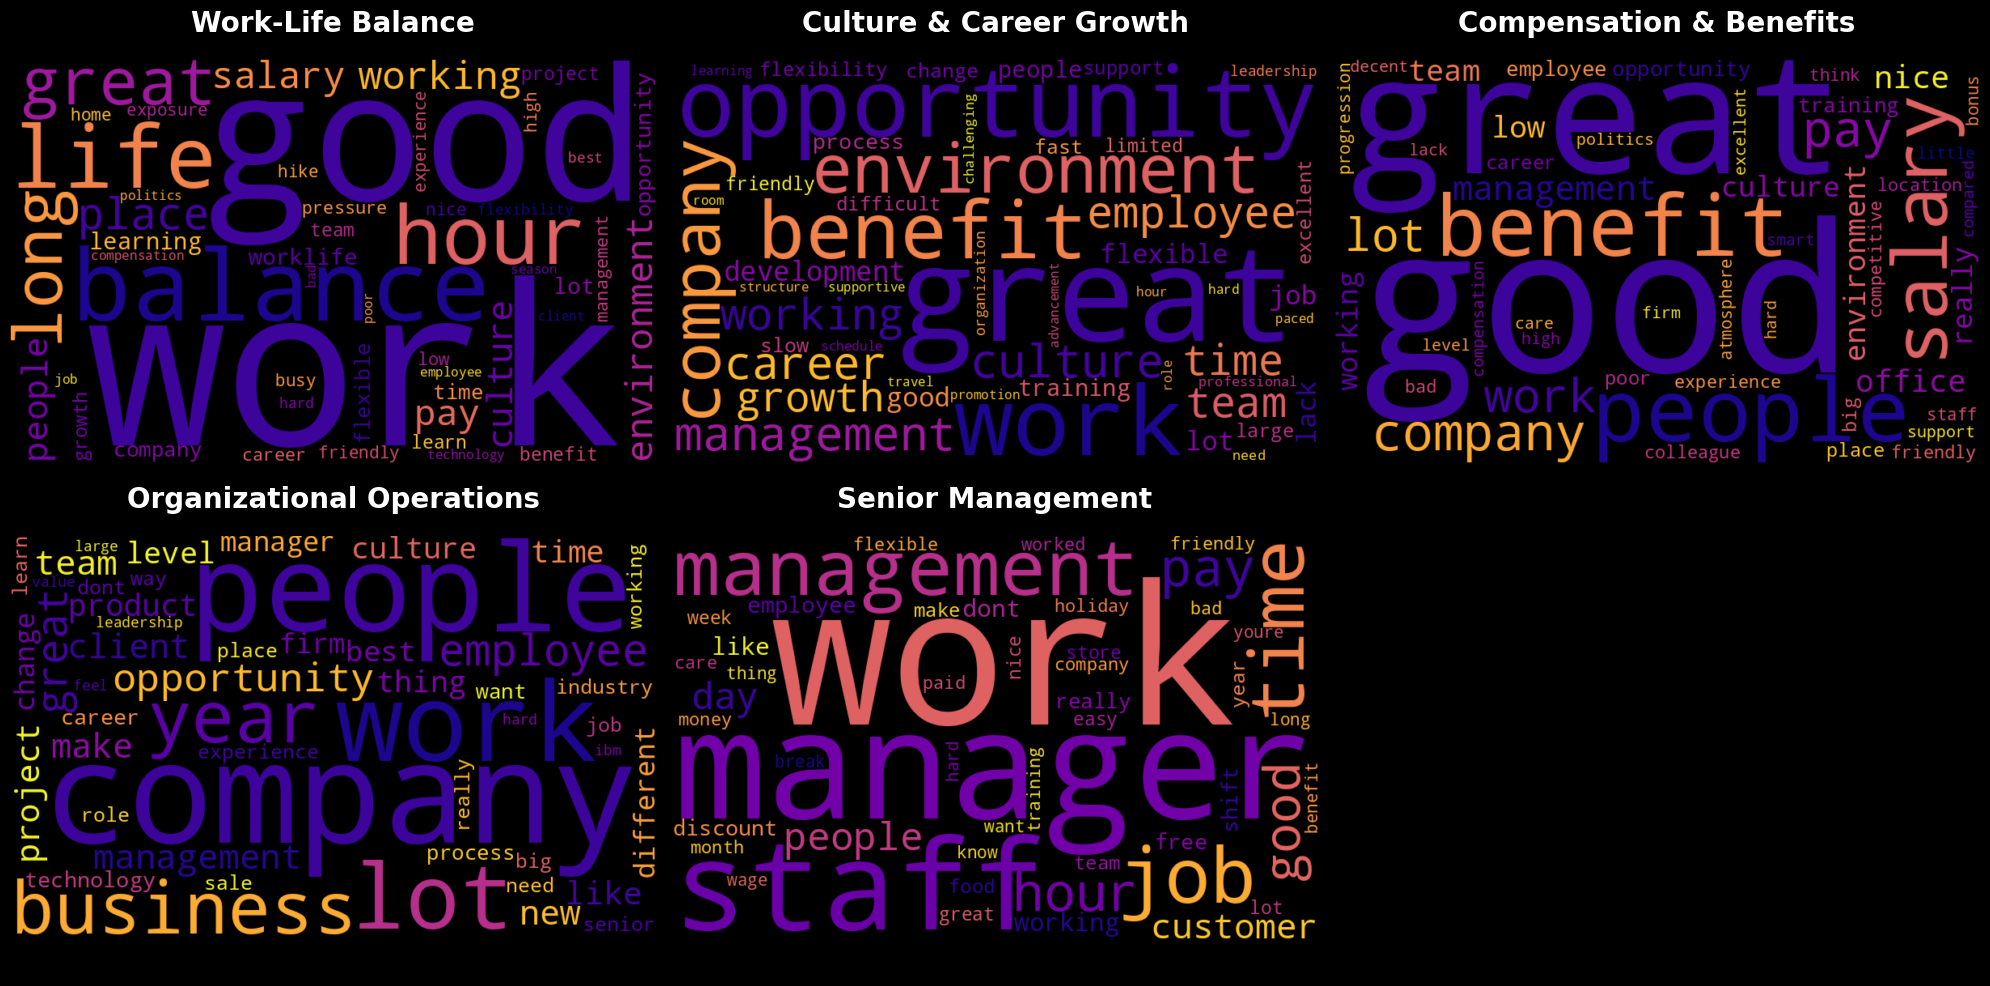

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

# for dark background
plt.style.use('dark_background')

# Setup the grid
num_topics = 5
cols = 3
rows = math.ceil(num_topics / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 10)) # Removed sharex/sharey to avoid axis lines
axes = axes.flatten()
feature_names = vectorizer.get_feature_names_out()

# Loop through topics
for topic_idx, topic in enumerate(lda_final.components_):

    # Prepare data
    top_features_ind = topic.argsort()[:-50 - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    weights = weights / weights.max()
    word_freq = dict(zip(top_features, weights))

    # 2. Create Dark Mode Cloud
    # background_color='black': Matches the dark theme
    # colormap='plasma': Neon colors (purple/orange/yellow) that glow on black
    wc = WordCloud(background_color='black',
                   colormap='plasma',
                   width=800, height=500,
                   random_state=42)
    wc.generate_from_frequencies(word_freq)

    # Plot
    topic_label = topic_mapping[topic_idx]
    ax = axes[topic_idx]
    ax.imshow(wc, interpolation='bilinear')

    # White Title for contrast
    ax.set_title(topic_label, fontsize=20, fontweight='bold', color='white', pad=20)
    ax.axis('off')

# Hide empty slots
for i in range(num_topics, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Hyperparameter Tuning (Using alpha)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# 1. Define the Alphas to test
# 0.01 = Very Strict (Review = 1 Topic)
# 1.0 = Very Loose (Review = Mix of Topics)
search_params = {
    'doc_topic_prior': [0.01, 0.1, 0.5, 0.9]
}

# 2. Setup the Model with your optimal 5 topics
lda_tuning = LatentDirichletAllocation(n_components=5, random_state=42)

# 3. Run Grid Search
print("Tuning Alpha... (This will take ~2-3 minutes)...")
model = GridSearchCV(lda_tuning, param_grid=search_params, cv=2, verbose=2, n_jobs=-1)
model.fit(dtm)

# 4. Result
print("\n" + "="*40)
print(f"BEST ALPHA FOUND: {model.best_params_['doc_topic_prior']}")
print("="*40)

Tuning Alpha... (This will take ~2-3 minutes)...
Fitting 2 folds for each of 4 candidates, totalling 8 fits

BEST ALPHA FOUND: 0.9


Hyperparameter Tuning (using learning decay)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# 1. Define the Decay rates to test
search_params = {
    'learning_decay': [0.5, 0.7, 0.9]
}

# 2. Setup the Model with YOUR LOCKED WINS
# K = 5 and Alpha = 0.9
lda_tuning = LatentDirichletAllocation(
    n_components=5,
    doc_topic_prior=0.9,
    random_state=42
)

# 3. Run Grid Search
# cv=2 is enough to check stability and it runs faster
print("Tuning Learning Decay...")
model = GridSearchCV(lda_tuning, param_grid=search_params, cv=2, verbose=2, n_jobs=-1)

model.fit(dtm)

# 4. The Winner
print("\n" + "="*40)
print(f"BEST DECAY FOUND: {model.best_params_['learning_decay']}")
print("="*40)
print(f"Best Log Likelihood Score: {model.best_score_:.2f}")

Tuning Learning Decay...
Fitting 2 folds for each of 3 candidates, totalling 6 fits

BEST DECAY FOUND: 0.5
Best Log Likelihood Score: -3310468.15


# NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

print("Starting NMF Approach...")

# 1. Create TF-IDF Matrix (NMF requires this, not CountVectorizer)
# TF-IDF lowers the weight of common words and highlights unique ones
print("1. Creating TF-IDF Matrix...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_dtm = tfidf_vectorizer.fit_transform(df_final['lemmatized_text'])

# 2. Train NMF Model
# We use the same 5 topics to keep the comparison fair
print("2. Training NMF Model (Fast)...")
nmf_model = NMF(n_components=5, random_state=42, init='nndsvd')
nmf_model.fit(tfidf_dtm)

# 3. Show the NMF Topics
print("\n NMF Training Complete! Here are the topics:")

feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic {topic_idx}: ", end='')
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Starting NMF Approach...
1. Creating TF-IDF Matrix...
2. Training NMF Model (Fast)...

 NMF Training Complete! Here are the topics:
Topic 0: great place work people benefit culture think environment company team
Topic 1: work balance life worklife culture growth learning hike opportunity salary
Topic 2: good pay salary environment benefit work bad culture place nice
Topic 3: hour long working flexible pay staff environment work time busy
Topic 4: company lot people opportunity management employee time job manager career


In [ ]:
!pip install gensim
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora

# 1. list of tokens for Coherence calculation
texts = [text.split() for text in df_final['lemmatized_text']]

# 2. Create Dictionary and Corpus (Gensim format)
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

# 3. Get the Top Words for each NMF topic to test
nmf_topics = []
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic in nmf_model.components_:
    # Get top 20 words for each topic
    top_indices = topic.argsort()[:-20 - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    nmf_topics.append(top_words)

# 4. Calculate Coherence
print("Calculating NMF Coherence Score...")
cm_nmf = CoherenceModel(topics=nmf_topics,
                        texts=texts,
                        dictionary=id2word,
                        coherence='c_v')

nmf_coherence = cm_nmf.get_coherence()

print(f"\n NMF Coherence Score: {nmf_coherence:.4f}")
print("(LDA score was 0.4319)")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.2 MB/s eta 0:00:00
Calculating NMF Coherence Score...

 NMF Coherence Score: 0.4069
(LDA score was 0.4319)


Final Training of the model


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

print("Training the FINAL Model...")

# 1. Initialize with your WINNING settings
best_lda_model = LatentDirichletAllocation(
    n_components=5,
    doc_topic_prior=0.9,
    learning_decay=0.5,
    random_state=42,
    n_jobs=-1               # Use all CPU power
)

# 2. Fit the model to the data
best_lda_model.fit(dtm)

print("Final Model Trained Successfully!")

# 3. Save the Model
import joblib
joblib.dump(best_lda_model, 'glassdoor_lda_final.pkl')
print("Model saved as 'glassdoor_lda_final.pkl'")

Training the FINAL Model...
Final Model Trained Successfully!
Model saved as 'glassdoor_lda_final.pkl'


In [ ]:
import numpy as np

print("Assigning topics to all reviews...")

# 1. Get the probability scores for every review
# (This tells us: "Review #1 is 10% Topic 0, 80% Topic 1...")
topic_results = best_lda_model.transform(dtm)

# 2. Pick the Winner (Dominant Topic)
# We take the highest score for each review
df_final['Topic_Num'] = topic_results.argmax(axis=1)

# 3. Save the Confidence Score (Optional but useful)
# This tells us how sure the model is (e.g., 0.95 is very sure)
df_final['Confidence'] = topic_results.max(axis=1)

print("Done! Here are the first 5 tagged reviews:")
print(df_final[['lemmatized_text', 'Topic_Num', 'Confidence']].head())

# 4. Save this MASTER file
# This is the file you will use for your Dashboard/Excel analysis
df_final.to_csv('/content/drive/MyDrive/glassdoor_with_topics.csv', index=False)
print("\n Saved as 'glassdoor_with_topics.csv'")

Assigning topics to all reviews...


NameError: name 'best_lda_model' is not defined

In [ ]:
# Print the Top 15 words for each topic in your FINAL model
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(best_lda_model.components_):
    print(f"Topic {topic_idx}: ", end='')
    print(" ".join([feature_names[i] for i in topic.argsort()[:-16:-1]]))

Topic 0: work good hour balance life pay long place salary learning flexible working hard culture people
Topic 1: great opportunity environment benefit culture work working management company career time growth employee development lack
Topic 2: people lot good benefit great team salary office training low nice big project management pay
Topic 3: company people business year employee product work new make level change management like thing way
Topic 4: manager staff management job time day pay customer dont like work working people hour really


In [ ]:
import pandas as pd

print("Fixing the missing column...")

# 1. RE-GENERATE the Topic Numbers (This fixes your KeyError)
# We ask the model to tag the reviews right now
topic_results = best_lda_model.transform(dtm)
df_final['Topic_Num'] = topic_results.argmax(axis=1)

# 2. Define the Names (Based on your keywords)
topic_names = {
    0: 'Work-Life Balance & Comp',
    1: 'Career Growth & Culture',
    2: 'Team & Office Environment',
    3: 'Business Strategy & Ops',
    4: 'Management & Daily Ops'
}

# 3. Map the names to the numbers
print("Applying Topic Labels...")
df_final['Topic_Label'] = df_final['Topic_Num'].map(topic_names)

Fixing the missing column...
Applying Topic Labels...


/tmp/ipython-input-776153845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Topic_Num'] = topic_results.argmax(axis=1)
/tmp/ipython-input-776153845.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Topic_Label'] = df_final['Topic_Num'].map(topic_names)


In [ ]:
df_final.head()

,firm,job_title,headline,overall_rating,pros,cons,combined_text,cleaned_reviews,lemmatized_text,Topic_Num,Topic_Label
99839,Bloomberg-L-P,Anonymous Employee,Not the company it used to be,3,"Good benefits package, fast paces environment","Politics, lack of transparency, basic respect ...","Good benefits package, fast paces environment ...",good benefits package fast paces environment p...,good benefit package fast pace environment pol...,1,Career Growth & Culture
539662,McDonald-s,Cashier,Not good for mental health,3,Crew members get work done and are welcoming a...,Most accidents don’t receive aid and there’s l...,Crew members get work done and are welcoming a...,crew members get work done welcoming reliable ...,crew member get work done welcoming reliable a...,4,Management & Daily Ops
684945,PwC,Anonymous Employee,Senior Associate,3,-Met some great people\r\n-Good exposure to cl...,-Work life balance can take a hit during busy ...,-Met some great people\r\n-Good exposure to cl...,met great people good exposure clients experie...,met great people good exposure client experien...,0,Work-Life Balance & Comp
528284,McDonald-s,Anonymous Employee,ok for first job,3,it's a job to pay bills,customers are very demanding and always have t...,it's a job to pay bills customers are very dem...,job pay bills customers demanding always toes,job pay bill customer demanding always toe,4,Management & Daily Ops
223564,Deutsche-Bank,,Employee friendly,5,Good working environment with motivational staff,Sometime you have to do work in Extra time,Good working environment with motivational sta...,good working environment motivational staff so...,good working environment motivational staff so...,4,Management & Daily Ops


Sentiment Analysis

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 1. Download the VADER dictionary
print(" Initializing VADER...")
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# 2. Define the scoring function
def get_vader_score(text):
    # Check if text is empty or not a string
    if pd.isna(text) or str(text).strip() == '':
        return 0.0
    # Return the 'compound' score (ranges from -1 to +1)
    return analyzer.polarity_scores(str(text))['compound']

# 3. Apply VADER to your RAW text columns
print("Calculating Sentiment Scores...")

# A. Score the PROS (Delight)
df_final['Pros_Score'] = df_final['pros'].apply(get_vader_score)

# B. Score the CONS (Frustration)
df_final['Cons_Score'] = df_final['cons'].apply(get_vader_score)

# C. Score the COMBINED TEXT (Overall Sentiment)
df_final['Overall_Vader_Score'] = df_final['combined_text'].apply(get_vader_score)

# 4. Preview the results
print("\n VADER Scores Calculated! Sample:")
print(df_final[['combined_text', 'Overall_Vader_Score']].head())

 Initializing VADER...
Calculating Sentiment Scores...


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/tmp/ipython-input-3025779614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pros_Score'] = df_final['pros'].apply(get_vader_score)
/tmp/ipython-input-3025779614.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cons_Score'] = df_final['cons'].apply(get_vader_score)



 VADER Scores Calculated! Sample:
                                            combined_text  Overall_Vader_Score
99839   Good benefits package, fast paces environment ...               0.7430
539662  Crew members get work done and are welcoming a...               0.0790
684945  -Met some great people\r\n-Good exposure to cl...               0.6249
528284  it's a job to pay bills customers are very dem...              -0.3804
223564  Good working environment with motivational sta...               0.4404


/tmp/ipython-input-3025779614.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Overall_Vader_Score'] = df_final['combined_text'].apply(get_vader_score)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print(" Testing VADER Accuracy...")

# 1. Define the translation function for STAR RATINGS
def map_stars_to_label(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# 2. Define the translation function for VADER SCORES
# Standard VADER logic: > 0.05 is positive, < -0.05 is negative
def map_vader_to_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# 3. Apply the translations to create two new columns for comparison
df_final['True_Label'] = df_final['overall_rating'].apply(map_stars_to_label)
df_final['Vader_Label'] = df_final['Overall_Vader_Score'].apply(map_vader_to_label)

# 4. Calculate Accuracy (How often did they match?)
accuracy = accuracy_score(df_final['True_Label'], df_final['Vader_Label'])

print(f"\n VADER Accuracy: {accuracy:.2%}")
print("\nDetailed Report:\n")
print(classification_report(df_final['True_Label'], df_final['Vader_Label']))

/tmp/ipython-input-3291524257.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['True_Label'] = df_final['overall_rating'].apply(map_stars_to_label)
/tmp/ipython-input-3291524257.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Vader_Label'] = df_final['Overall_Vader_Score'].apply(map_vader_to_label)


 Testing VADER Accuracy...

 VADER Accuracy: 61.30%

Detailed Report:

              precision    recall  f1-score   support

    Negative       0.42      0.35      0.38      7953
     Neutral       0.29      0.05      0.09     11537
    Positive       0.66      0.90      0.76     30351

    accuracy                           0.61     49841
   macro avg       0.46      0.43      0.41     49841
weighted avg       0.54      0.61      0.54     49841



Sentiment Analysis using Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

print(" Starting Logistic Regression Pipeline...")

# 1. Vectorization: Convert text into a matrix of numbers (TF-IDF)
# We limit to 5000 words to keep it clean and fast
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_final['combined_text'])
y = df_final['True_Label']

# 2. Split the data: 80% to train the model, 20% to test it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 4. Make predictions on the hidden 20% (the test set)
y_pred_log = log_model.predict(X_test)

# 5. Check the result
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f"\n Logistic Regression Accuracy: {log_accuracy:.2%}")
print(f"Improvement over VADER: {log_accuracy - 0.613:.2%}")

 Starting Logistic Regression Pipeline...

 Logistic Regression Accuracy: 66.86%
Improvement over VADER: 5.56%


In [ ]:
# 1. Generate predictions for EVERY row in the dataset
# We use the 'tfidf' and 'log_model' we just created
X_all = tfidf.transform(df_final['combined_text'])
df_final['LogReg_Prediction'] = log_model.predict(X_all)

# 2. Select columns to see them side-by-side
# We show: The Review, The Original Star Rating, and the Model's guess
comparison_view = df_final[['combined_text', 'overall_rating', 'True_Label', 'LogReg_Prediction']]

print("Side-by-Side Comparison (First 10 rows):")
display(comparison_view.head(10))

Side-by-Side Comparison (First 10 rows):


/tmp/ipython-input-1051003668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['LogReg_Prediction'] = log_model.predict(X_all)


,combined_text,overall_rating,True_Label,LogReg_Prediction
99839,"Good benefits package, fast paces environment ...",3,Neutral,Neutral
539662,Crew members get work done and are welcoming a...,3,Neutral,Positive
684945,-Met some great people\r\n-Good exposure to cl...,3,Neutral,Neutral
528284,it's a job to pay bills customers are very dem...,3,Neutral,Neutral
223564,Good working environment with motivational sta...,5,Positive,Positive
435475,Fantastic company to work for great values and...,4,Positive,Positive
657694,Good environment. Educational benefits. Opport...,4,Positive,Positive
816445,"+friendly environment, VPN line, Golds Gym it'...",4,Positive,Positive
64616,Working for a french company means you get amp...,4,Positive,Positive
253854,Good exposure to varying work and a great plac...,4,Positive,Positive


In [ ]:
print("Optimizing with Bi-grams...")

# 1. New Vectorizer: ngram_range=(1, 2) means look at single words AND pairs
tfidf_optimized = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))

# 2. Re-transform the text
X_opt = tfidf_optimized.fit_transform(df_final['combined_text'])
y = df_final['True_Label']

# 3. Re-split
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y, test_size=0.2, random_state=42)

# 4. Re-train
log_model_optimized = LogisticRegression(max_iter=1000)
log_model_optimized.fit(X_train_opt, y_train_opt)

# 5. Check new accuracy
y_pred_opt = log_model_optimized.predict(X_test_opt)
new_accuracy = accuracy_score(y_test_opt, y_pred_opt)

print(f"\n Optimized Accuracy: {new_accuracy:.2%}")

Optimizing with Bi-grams...

 Optimized Accuracy: 67.08%


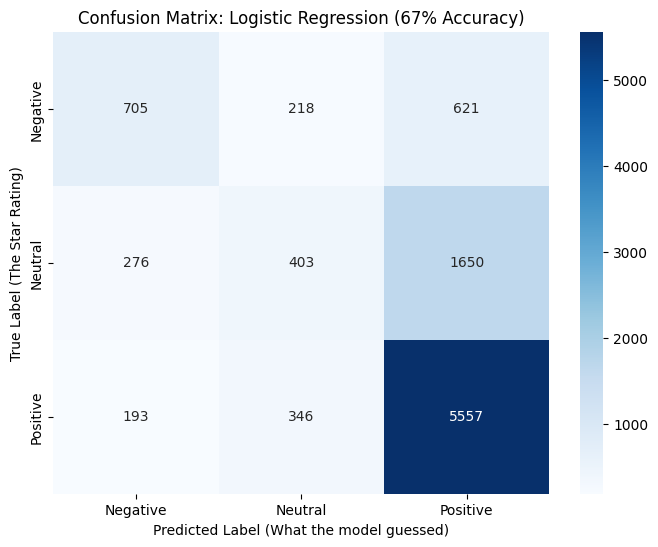

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Use the Logistic Regression predictions we made earlier (y_pred_log)
# We compare the Test set 'Truth' against the 'Prediction'
cm = confusion_matrix(y_test, y_pred_log)

# 2. Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])

plt.title('Confusion Matrix: Logistic Regression (67% Accuracy)')
plt.xlabel('Predicted Label (What the model guessed)')
plt.ylabel('True Label (The Star Rating)')
plt.show()

⚖️ Training Balanced Logistic Regression...

🎯 Balanced Accuracy: 59.62%


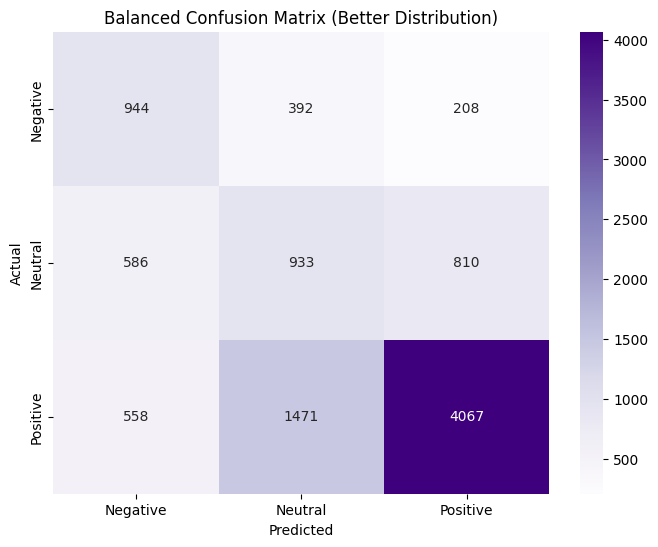

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

print("⚖️ Training Balanced Logistic Regression...")

# We add class_weight='balanced' to handle the bias
log_model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    C=0.5
)

# 2. Train
log_model_balanced.fit(X_train_opt, y_train_opt)

# 3. Predict
y_pred_bal = log_model_balanced.predict(X_test_opt)

# 4. Check the NEW Accuracy (It will be lower, but the distribution will be better)
bal_accuracy = accuracy_score(y_test_opt, y_pred_bal)
print(f"\n🎯 Balanced Accuracy: {bal_accuracy:.2%}")

# 5. Plot the Confusion Matrix to see the distribution
cm = confusion_matrix(y_test_opt, y_pred_bal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Balanced Confusion Matrix (Better Distribution)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

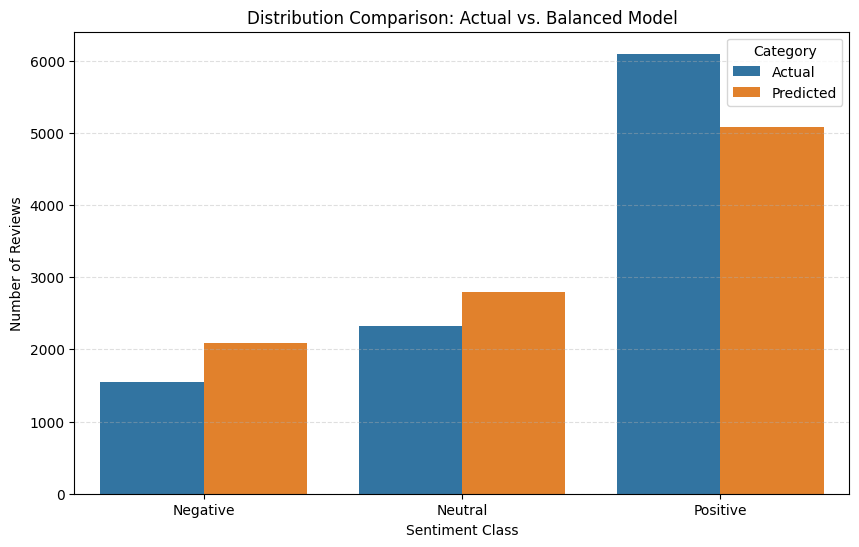

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data for the plot
# We create a dataframe with the actual labels and our new balanced predictions
df_results = pd.DataFrame({
    'Actual': y_test_opt,
    'Predicted': y_pred_bal
})

# 2. Reshape for plotting
df_plot = df_results.melt(var_name='Category', value_name='Sentiment')

# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot, x='Sentiment', hue='Category',
              palette=['#1f77b4', '#ff7f0e'],
              order=['Negative', 'Neutral', 'Positive'])

plt.title('Distribution Comparison: Actual vs. Balanced Model')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment Class')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

🧹 Refining features using Chi-Squared selection (Standardized Scale)...


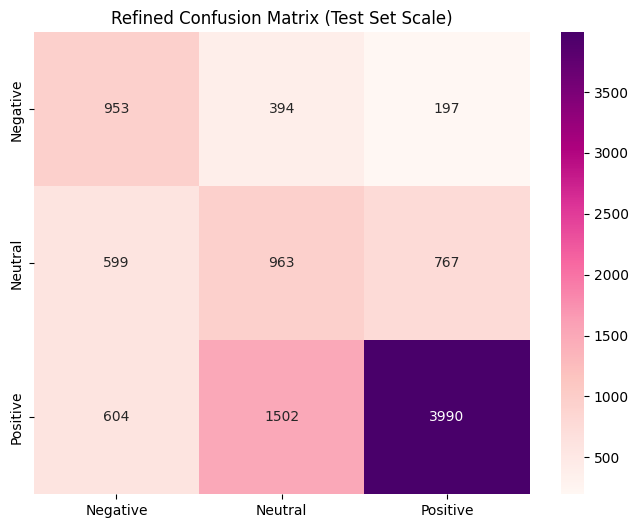

✅ Refined Test Accuracy: 59.24%


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

print("🧹 Refining features using Chi-Squared selection (Standardized Scale)...")

# 1. Build the Pipeline
optimized_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')),
    ('feature_select', SelectKBest(chi2, k=2500)),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced', C=0.5))
])

# (Using the X/y splits we defined earlier)
optimized_pipeline.fit(df_final.loc[y_train_opt.index, 'combined_text'], y_train_opt)

# This ensures the scale matches your previous confusion matrices
y_pred_refine_test = optimized_pipeline.predict(df_final.loc[y_test_opt.index, 'combined_text'])

# 4. Plot the Confusion Matrix
cm_refine = confusion_matrix(y_test_opt, y_pred_refine_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_refine, annot=True, fmt='d', cmap='RdPu',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Refined Confusion Matrix (Test Set Scale)')
plt.show()

print(f"✅ Refined Test Accuracy: {accuracy_score(y_test_opt, y_pred_refine_test):.2%}")

In [ ]:
from sklearn.metrics import classification_report

# Print the full report for the Test Set
print("📊 Final Model Evaluation (Balanced Logistic Regression):")
print(classification_report(y_test_opt, y_pred_refine_test))

📊 Final Model Evaluation (Balanced Logistic Regression):
              precision    recall  f1-score   support

    Negative       0.44      0.62      0.52      1544
     Neutral       0.34      0.41      0.37      2329
    Positive       0.81      0.65      0.72      6096

    accuracy                           0.59      9969
   macro avg       0.53      0.56      0.54      9969
weighted avg       0.64      0.59      0.61      9969



In [ ]:
def predict_new_review(text):
    # 1. Use the optimized pipeline to predict
    prediction = optimized_pipeline.predict([text])[0]

    # 2. Get the probability scores (optional, but shows confidence)
    probs = optimized_pipeline.predict_proba([text])[0]
    classes = optimized_pipeline.classes_

    print(f"\n Review: '{text}'")
    print(f" Predicted Sentiment: {prediction}")
    print(f"Confidence: {dict(zip(classes, [f'{p:.2%}' for p in probs]))}")

# --- TEST IT HERE ---
# You can change these strings to whatever you want
predict_new_review("The pay is good but the management is quite toxic and I hate the hours.")
predict_new_review("Standard corporate job, nothing special but nothing terrible.")
predict_new_review("I absolutely love the culture and my team is amazing!")


 Review: 'The pay is good but the management is quite toxic and I hate the hours.'
 Predicted Sentiment: Negative
Confidence: {'Negative': '76.31%', 'Neutral': '12.84%', 'Positive': '10.85%'}

 Review: 'Standard corporate job, nothing special but nothing terrible.'
 Predicted Sentiment: Negative
Confidence: {'Negative': '73.62%', 'Neutral': '18.99%', 'Positive': '7.40%'}

 Review: 'I absolutely love the culture and my team is amazing!'
 Predicted Sentiment: Positive
Confidence: {'Negative': '11.99%', 'Neutral': '5.59%', 'Positive': '82.43%'}


🛡️ Custom Stopwords ready. Protected 8 logic-shifting words.

🎯 Optimized Accuracy: 60.33%

📊 New Classification Report:
              precision    recall  f1-score   support

    Negative       0.46      0.65      0.54      1544
     Neutral       0.34      0.41      0.37      2329
    Positive       0.81      0.66      0.73      6096

    accuracy                           0.60      9969
   macro avg       0.54      0.58      0.55      9969
weighted avg       0.65      0.60      0.62      9969



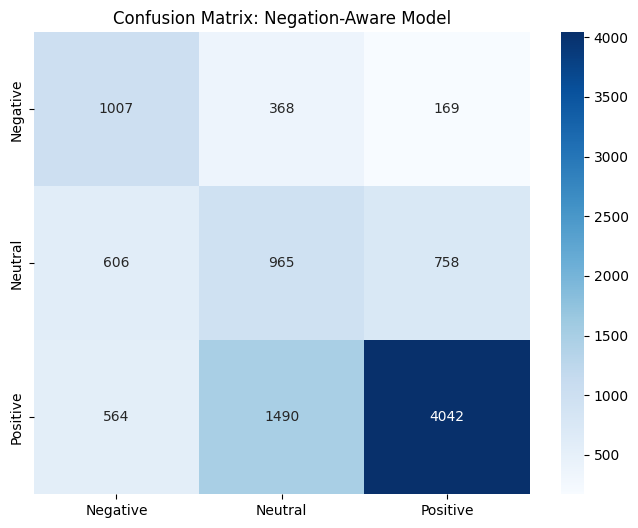

In [ ]:
from sklearn.feature_extraction import text

# 1. Create a custom stopword list
# We start with the standard English list
standard_stops = text.ENGLISH_STOP_WORDS

# 2. List of words we want to PROTECT (Keep these in the data)
# These words are vital for identifying Neutral (mixed) and Negative sentiment
protected_words = {'not', 'no', 'but', 'however', 'yet', 'never', 'only', 'against'}

# Create the final list by removing the protected words from the standard list
custom_stop_words = [word for word in standard_stops if word not in protected_words]

print(f"🛡️ Custom Stopwords ready. Protected {len(protected_words)} logic-shifting words.")

# 3. Update the Pipeline with the Custom Stopwords
optimized_pipeline_v2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000,
                             ngram_range=(1, 2),
                             stop_words=custom_stop_words)), # Using our new list
    ('feature_select', SelectKBest(chi2, k=2500)),
    ('log_reg', LogisticRegression(max_iter=1000,
                                 class_weight='balanced',
                                 C=0.5))
])

# 4. Re-train and Re-evaluate
optimized_pipeline_v2.fit(df_final.loc[y_train_opt.index, 'combined_text'], y_train_opt)
y_pred_v2 = optimized_pipeline_v2.predict(df_final.loc[y_test_opt.index, 'combined_text'])

# 5. Check the Final Results
print(f"\n🎯 Optimized Accuracy: {accuracy_score(y_test_opt, y_pred_v2):.2%}")
print("\n📊 New Classification Report:")
print(classification_report(y_test_opt, y_pred_v2))

# 6. Confusion Matrix Comparison
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_opt, y_pred_v2), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix: Negation-Aware Model')
plt.show()

Extractive Summary and Integration

In [ ]:
import joblib
from google.colab import files

# 1. Save the model to the Colab disk
model_filename = 'sentiment_pipeline_v2.pkl'
joblib.dump(optimized_pipeline_v2, model_filename)

print(f"✅ Model saved locally as {model_filename}")

# 2. Trigger a download to your computer
files.download(model_filename)

✅ Model saved locally as sentiment_pipeline_v2.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# 1. Load the saved Topic Model
best_lda_model = joblib.load('glassdoor_lda_final.pkl')

# 2. Transform the existing dtm to get topic distributions
topic_results = best_lda_model.transform(dtm)

# 3. Assign the winning Topic Number (0-4)
df_final['Topic_Num'] = topic_results.argmax(axis=1)

# 4. Map the numbers to your Topic Labels
# (Ensure these match the 5 categories you identified earlier)
topic_map = {
    0: 'Work-Life Balance',
    1: 'Management',
    2: 'Salary & Benefits',
    3: 'Company Culture',
    4: 'Career Growth'
}
df_final['Topic_Label'] = df_final['Topic_Num'].map(topic_map)

print("✅ Topics successfully restored to df_final!")
print(df_final[['combined_text', 'Topic_Label']].head())

✅ Topics successfully restored to df_final!
                                            combined_text        Topic_Label
99839   Good benefits package, fast paces environment ...         Management
539662  Crew members get work done and are welcoming a...      Career Growth
684945  -Met some great people\r\n-Good exposure to cl...  Work-Life Balance
528284  it's a job to pay bills customers are very dem...      Career Growth
223564  Good working environment with motivational sta...      Career Growth


/tmp/ipython-input-2245275412.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Topic_Num'] = topic_results.argmax(axis=1)
/tmp/ipython-input-2245275412.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Topic_Label'] = df_final['Topic_Num'].map(topic_map)


In [ ]:
# 1. Generate predictions for the entire dataset
# This creates the 'Final_Refined_Pred' column that the summarizer needs
print("🧠 Predicting sentiments for the full dataset...")
df_final['Final_Refined_Pred'] = optimized_pipeline_v2.predict(df_final['combined_text'])

# 2. Quick check to ensure the column is there and populated
print("✅ Sentiment predictions added!")
print(df_final['Final_Refined_Pred'].value_counts())

# 3. Double check: Do we have both required columns?
required_cols = ['Topic_Label', 'Final_Refined_Pred']
if all(col in df_final.columns for col in required_cols):
    print("\n🚀 ALL SYSTEMS GO: Both Topics and Sentiments are ready for summarization.")
else:
    print("\n⚠️ Warning: One of the columns is still missing. Check the logic above.")

🧠 Predicting sentiments for the full dataset...
✅ Sentiment predictions added!
Final_Refined_Pred
Positive    25135
Neutral     13914
Negative    10792
Name: count, dtype: int64

🚀 ALL SYSTEMS GO: Both Topics and Sentiments are ready for summarization.


/tmp/ipython-input-2803967503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Final_Refined_Pred'] = optimized_pipeline_v2.predict(df_final['combined_text'])


ABSTRACTIVE SUMMARY

In [ ]:
import pandas as pd
from transformers import pipeline
import logging

# 1. Setup & Configuration
logging.getLogger("transformers").setLevel(logging.ERROR)

print("⏳ Initializing Summarization Model (this may take 10-20 seconds)...")
try:
    # 'distilbart-cnn-12-6' is optimized for summarization
    summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")
except Exception as e:
    print("❌ Error loading model. Ensure 'transformers' and 'torch' are installed.")
    raise e

def generate_coherent_summary(reviews, max_input_chars=3000):
    """
    Generates a single coherent paragraph summary from a list of reviews.
    """
    if not reviews or len(reviews) < 3:
        return "Insufficient data to generate a reliable summary (fewer than 3 reviews)."

    # Combine reviews and strip whitespace
    combined_text = " ".join([str(r).strip() for r in reviews])

    # Truncate to avoid model token limits
    if len(combined_text) > max_input_chars:
        combined_text = combined_text[:max_input_chars]

    try:
        # Generate summary: min 30 words, max 90 words, deterministic output
        summary_output = summarizer(combined_text, max_length=90, min_length=30, do_sample=False)
        return summary_output[0]['summary_text']
    except Exception as e:
        return f"Error during generation: {str(e)}"

# --- MAIN EXECUTION LOOP ---

print("\n🚀 GENERATING EXECUTIVE SUMMARIES...\n")
print("="*60)

# Ensure topics are clean strings
topics = df_final['Topic_Label'].astype(str).unique()

for topic in sorted(topics):
    if topic.lower() in ['nan', 'none', '']: continue

    # --- ISOLATION STEP ---

    # 1. Filter POSITIVE reviews for PROS (Using 'Final_Refined_Pred')
    pros_reviews = df_final[
        (df_final['Topic_Label'] == topic) &
        (df_final['Final_Refined_Pred'] == 'Positive')
    ]['combined_text'].tolist()

    # 2. Filter NEGATIVE reviews for CONS (Using 'Final_Refined_Pred')
    cons_reviews = df_final[
        (df_final['Topic_Label'] == topic) &
        (df_final['Final_Refined_Pred'] == 'Negative')
    ]['combined_text'].tolist()

    # --- GENERATION STEP ---
    pros_summary = generate_coherent_summary(pros_reviews)
    cons_summary = generate_coherent_summary(cons_reviews)

    # --- OUTPUT STEP ---
    print(f"Topic: {topic}")
    print("\nPros Summary:")
    print(pros_summary)
    print("\nCons Summary:")
    print(cons_summary)
    print("-" * 60)

⏳ Initializing Summarization Model (this may take 10-20 seconds)...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]


🚀 GENERATING EXECUTIVE SUMMARIES...

Topic: Career Growth

Pros Summary:
 The people are really friendly and polite and feel like im treated like an adult . Talented ambassadors who care about the guests and their co-workers like family . Good working environment with motivational staff Sometime you have to do work in Extra time Asking for too much maan Leave me alone mate Mann .

Cons Summary:
 The atmosphere at ASOS is lovely, there is a really team spirit within the teams. The building is wonderful, the canteen has some amazing and cheap food. Of course a big bonus is the discount and sample sales .
------------------------------------------------------------
Topic: Company Culture

Pros Summary:
 Work/life balance may not be great (Early starts or late finishes) Can be a physically demanding job with a target time (some of which are very ambitious) Huge commitment to training and development .

Cons Summary:
 Management is in general 'out to lunch' -  Too many bureaucratic 'red ta

EXTRACTIVE SUMMARY

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ensure tokenizer is ready
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

def is_objective(sentence):
    """
    Step 1 Filter: Returns False if sentence contains personal pronouns
    or is too short/fragmented.
    """
    s_lower = sentence.lower().strip()

    # a) Length check (Fragments)
    if len(s_lower.split()) < 6:
        return False

    # b) Personal language check
    # Regex checks for: Start of string or space + [i, my, me, im] + space or punctuation
    personal_patterns = [
        r'\bi\b', r'\bmy\b', r'\bme\b', r'\bim\b', r'\bi\'m\b', r'\bmine\b'
    ]
    for pattern in personal_patterns:
        if re.search(pattern, s_lower):
            return False

    return True

def select_top_ranked_sentences(texts, max_sents=3):
    """
    Steps 2 & 3: Scoring and Hard Selection
    """
    if not texts:
        return "Insufficient feedback available for this aspect."

    # --- STEP 1: SENTENCE ELIGIBILITY FILTER ---
    full_text = " ".join([str(t) for t in texts])
    try:
        raw_sentences = nltk.sent_tokenize(full_text)
    except:
        raw_sentences = full_text.split(". ")

    # Apply strict filter
    candidates = []
    seen = set()
    for s in raw_sentences:
        clean_s = s.strip()
        if clean_s not in seen and is_objective(clean_s):
            candidates.append(clean_s)
            seen.add(clean_s)

    # Check minimum requirements
    if len(candidates) < 2:
        return "Insufficient feedback available for this aspect."

    # --- STEP 2: SENTENCE SCORING (Centrality) ---
    try:
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(candidates)

        # Calculate Centroid (The "Average" opinion)
        centroid = np.asarray(tfidf_matrix.mean(axis=0))

        # Score every sentence against the centroid
        scores = cosine_similarity(centroid, tfidf_matrix).flatten()

        # Rank indices by score (Highest = Most Representative)
        ranked_indices = scores.argsort()[::-1]
    except:
        # Fallback if vectorization fails (rare)
        return " ".join(candidates[:2])

    # --- STEP 3: HARD SELECTION (Redundancy Removal) ---
    final_selection = []
    selected_vectors = []

    for idx in ranked_indices:
        if len(final_selection) >= max_sents:
            break

        current_vec = tfidf_matrix[idx]

        # Diversity Check: Don't pick sentences that say the exact same thing
        is_redundant = False
        if selected_vectors:
            sims = cosine_similarity(current_vec, np.vstack(selected_vectors))
            if np.max(sims) > 0.65: # Threshold for "too similar"
                is_redundant = True

        if not is_redundant:
            final_selection.append(candidates[idx])
            selected_vectors.append(current_vec.toarray()[0])

    # Final Count Check
    if len(final_selection) < 2:
        return "Insufficient feedback available for this aspect."

    # --- STEP 4: OUTPUT ---
    return " ".join(final_selection)

# --- EXECUTION ---

print("📊 GENERATING STRICT EXTRACTIVE SUMMARIES")
print("="*60)

# Use cleaned topics
topics = df_final['Topic_Label'].astype(str).unique()

for topic in sorted(topics):
    if topic.lower() in ['nan', 'none', '']: continue

    # 1. Strict Isolation
    pos_texts = df_final[
        (df_final['Topic_Label'] == topic) &
        (df_final['Final_Refined_Pred'] == 'Positive')
    ]['combined_text'].tolist()

    neg_texts = df_final[
        (df_final['Topic_Label'] == topic) &
        (df_final['Final_Refined_Pred'] == 'Negative')
    ]['combined_text'].tolist()

    # 2. Process
    pros_summary = select_top_ranked_sentences(pos_texts)
    cons_summary = select_top_ranked_sentences(neg_texts)

    # 3. Output
    print(f"Topic: {topic}")
    print("\nPros Summary:")
    print(pros_summary)
    print("\nCons Summary:")
    print(cons_summary)
    print("-" * 60)

📊 GENERATING STRICT EXTRACTIVE SUMMARIES
Topic: Career Growth

Pros Summary:
People to work with are great. Less interactive with customers than if you were on a till Sometimes lonely as you had to work alone They provide you with a company car, fuel card, annual bonus and pay reviews Location - a bit far out Great staff to work with Can not think of any People (apart from manager)
Atmosphere
Parties
Working Hours 
Commute Pay, Manager, Car park, Bonus, Benefits, Desk size Enjoyed working with other partners Day and Night shift divide Good food, friendly environment, nice people, study Bad time, boring, tense, nervous Flexible hours, great pay, amazing benefits Sometimes demanding customers, turnover, insanely busy during holidays Great People and very supportive You will work very hard 7 days a week Benefits package including gym membership and one for a family member, free private healthcare, allowing quicker access to necessary operations and treatments Regular training modules to d

/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3918: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


 DONE! Model saved locally at: ./saved_summary_model


In [ ]:
import shutil
from google.colab import files

# 1. Zip the folder (Compress it)
# format: shutil.make_archive(output_filename, 'zip', folder_to_zip)
print(" Zipping the model folder...")
shutil.make_archive('summary_model', 'zip', './saved_summary_model')

# 2. Download the zip file to your local computer
print(" Downloading 'summary_model.zip'...")
files.download('summary_model.zip')

 Zipping the model folder...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
from google.colab import files

print("Saving the Vectorizer...")
# 1. Save the model to a local file in Colab
joblib.dump(vectorizer, 'count_vectorizer.pkl')

# 2. Download it to your computer
print("⬇Downloading 'count_vectorizer.pkl'...")
files.download('count_vectorizer.pkl')

Saving the Vectorizer...
⬇Downloading 'count_vectorizer.pkl'...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(optimized_pipeline_v2.named_steps['log_reg'].classes_)

['Negative' 'Neutral' 'Positive']


In [ ]:
df_final

,firm,job_title,headline,overall_rating,pros,cons,combined_text,cleaned_reviews,lemmatized_text,Topic_Num,Topic_Label,Pros_Score,Cons_Score,Overall_Vader_Score,True_Label,Vader_Label,LogReg_Prediction,Final_Refined_Pred
99839,Bloomberg-L-P,Anonymous Employee,Not the company it used to be,3,"Good benefits package, fast paces environment","Politics, lack of transparency, basic respect ...","Good benefits package, fast paces environment ...",good benefits package fast paces environment p...,good benefit package fast pace environment pol...,1,Management,0.6705,0.2023,0.7430,Neutral,Positive,Neutral,Neutral
539662,McDonald-s,Cashier,Not good for mental health,3,Crew members get work done and are welcoming a...,Most accidents don’t receive aid and there’s l...,Crew members get work done and are welcoming a...,crew members get work done welcoming reliable ...,crew member get work done welcoming reliable a...,4,Career Growth,0.4404,-0.3804,0.0790,Neutral,Positive,Positive,Neutral
684945,PwC,Anonymous Employee,Senior Associate,3,-Met some great people\r\n-Good exposure to cl...,-Work life balance can take a hit during busy ...,-Met some great people\r\n-Good exposure to cl...,met great people good exposure clients experie...,met great people good exposure client experien...,0,Work-Life Balance,0.7906,-0.4404,0.6249,Neutral,Positive,Neutral,Neutral
528284,McDonald-s,Anonymous Employee,ok for first job,3,it's a job to pay bills,customers are very demanding and always have t...,it's a job to pay bills customers are very dem...,job pay bills customers demanding always toes,job pay bill customer demanding always toe,4,Career Growth,-0.1027,-0.2944,-0.3804,Neutral,Negative,Neutral,Neutral
223564,Deutsche-Bank,,Employee friendly,5,Good working environment with motivational staff,Sometime you have to do work in Extra time,Good working environment with motivational sta...,good working environment motivational staff so...,good working environment motivational staff so...,4,Career Growth,0.4404,0.0000,0.4404,Positive,Positive,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648874,Pearson,,Disconnected leadership,2,Good bennefits. Strong company with a solid b...,Poor communication from leadership. Need to g...,Good bennefits. Strong company with a solid b...,good bennefits strong company solid businees p...,good bennefits strong company solid businees p...,3,Company Culture,0.8484,-0.2732,0.7967,Negative,Positive,Neutral,Neutral
425651,J-P-Morgan,Teller,it was ok,3,it was fun for a moment. you don’t make much a...,small pay\r\nsome days were just incredibly sl...,it was fun for a moment. you don’t make much a...,fun moment dont make much teller loved everyon...,fun moment dont make much teller loved everyon...,4,Career Growth,0.9224,-0.0516,0.9127,Neutral,Positive,Positive,Negative
251145,EY,Manager,"Great people, low skills",3,People are great and the culture is good,Lower investment in skill building. Lots of re...,People are great and the culture is good Lower...,people great culture good lower investment ski...,people great culture good lower investment ski...,2,Salary & Benefits,0.7906,-0.2960,0.7003,Neutral,Positive,Positive,Positive
287820,Google,Staff Software Engineer,Huge Freedom and smart people,5,Huge freedom to pursue the projects I want. Sm...,New features need to ensure privacy of the use...,Huge freedom to pursue the projects I want. Sm...,huge freedom pursue projects want smart people...,huge freedom pursue project want smart people ...,3,Company Culture,0.9477,0.8176,0.9750,Positive,Positive,Positive,Positive
